<a href="https://colab.research.google.com/github/Ujjwalb2/Surge_files/blob/main/Hyperspectral_LSTM_model_build_up_from_images_csv_data_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **preprocessing of the main data to get the data of the leek from 4 different types of fruit and assign label to the leek


In [3]:
# df=pd.read_csv('/content/SpectroFood_dataset.csv')

In [7]:
# df.head()
# #

,Leek,DRY MATTER,397.66,400.28,402.9,405.52,408.13,410.75,413.37,416,...,1684.44,1688.02,1691.59,1695.17,1698.75,1702.33,1705.91,1709.49,1713.07,1716.65
0,L1,0.168032787,0.415485,0.383244,0.351456,0.326875,0.308858,0.296541,0.288141,0.280010,...,0.215581,0.217577,0.220452,0.223861,0.228166,0.233664,0.240525,0.248254,0.256775,0.263427
1,L2,0.171717172,0.417281,0.383864,0.350971,0.326197,0.307104,0.294010,0.285275,0.277006,...,0.210253,0.212093,0.214919,0.218351,0.222681,0.228466,0.235393,0.243194,0.251689,0.258660
2,L3,0.145,0.424143,0.392674,0.361699,0.337758,0.319835,0.308165,0.300610,0.293103,...,0.197826,0.199926,0.202916,0.206433,0.210867,0.216627,0.223640,0.231442,0.240114,0.247030
3,L4,0.160655738,0.421169,0.392193,0.362329,0.338916,0.320957,0.310502,0.302020,0.293645,...,0.193815,0.195960,0.198973,0.202568,0.207206,0.212854,0.219782,0.227738,0.236556,0.243064
4,L5,0.147435897,0.424819,0.392754,0.360710,0.335537,0.317260,0.304983,0.296590,0.288411,...,0.215046,0.217001,0.219864,0.223265,0.227586,0.233124,0.239957,0.247428,0.256028,0.262627


In [17]:
# df.isnull().sum()

<bound method DataFrame.info of      Leek   DRY MATTER    397.66    400.28     402.9    405.52    408.13  \
0      L1  0.168032787  0.415485  0.383244  0.351456  0.326875  0.308858   
1      L2  0.171717172  0.417281  0.383864  0.350971  0.326197  0.307104   
2      L3        0.145  0.424143  0.392674  0.361699  0.337758  0.319835   
3      L4  0.160655738  0.421169  0.392193  0.362329  0.338916  0.320957   
4      L5  0.147435897  0.424819  0.392754  0.360710  0.335537  0.317260   
...   ...          ...       ...       ...       ...       ...       ...   
1054  NaN          NaN       NaN       NaN       NaN       NaN       NaN   
1055  NaN          NaN       NaN       NaN       NaN       NaN       NaN   
1056  NaN          NaN       NaN       NaN       NaN       NaN       NaN   
1057  NaN          NaN       NaN       NaN       NaN       NaN       NaN   
1058  NaN          NaN       NaN       NaN       NaN       NaN       NaN   

        410.75    413.37       416  ...   1684.44   1688.02   1691.59  \
0     0.296541  0.288141  0.280010  ...  0.215581  0.217577  0.220452   
1     0.294010  0.285275  0.277006  ...  0.210253  0.212093  0.214919   
2     0.308165  0.300610  0.293103  ...  0.197826  0.199926  0.202916   
3     0.310502  0.302020  0.293645  ...  0.193815  0.195960  0.198973   
4     0.304983  0.296590  0.288411  ...  0.215046  0.217001  0.219864   
...        ...       ...       ...  ...       ...       ...       ...   
1054       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1055       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1056       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1057       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1058       NaN       NaN       NaN  ...       NaN       NaN       NaN   

       1695.17   1698.75   1702.33   1705.91   1709.49   1713.07   1716.65  
0     0.223861  0.228166  0.233664  0.240525  0.248254  0.256775  0.263427  
1     0.218351  0.222681  0.228466  0.235393  0.243194  0.251689  0.258660  
2     0.206433  0.210867  0.216627  0.223640  0.231442  0.240114  0.247030  
3     0.202568  0.207206  0.212854  0.219782  0.227738  0.236556  0.243064  
4     0.223265  0.227586  0.233124  0.239957  0.247428  0.256028  0.262627  
...        ...       ...       ...       ...       ...       ...       ...  
1054       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
1055       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
1056       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
1057       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
1058       NaN       NaN       NaN       NaN       NaN       NaN       NaN  

[1059 rows x 423 columns]>

In [41]:
# def assign_label(dry_matter,dtype=float):
#     if (dry_matte) < 0.10:
#         return 'Unripe'
#     elif 0.10 <= dry_matter < 0.13:
#         return 'Ripe'
#     elif 0.13 <= dry_matter < 0.16:
#         return 'Overripe'
#     else:
#         return 'Rotten'

In [42]:
# df['DRY MATTER'] = pd.to_numeric(df['DRY MATTER'], errors='coerce')

In [43]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Columns: 423 entries, Leek to 1716.65
dtypes: float64(422), object(1)
memory usage: 3.4+ MB


In [36]:
# data = df.dropna(subset=['DRY MATTER'])

In [44]:
# data['Label'] = data['DRY MATTER'].apply(assign_label)

<ipython-input-44-9b3e8f2c3136>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Label'] = data['DRY MATTER'].apply(assign_label)


In [46]:
# data.to_csv('labeled_data.csv', index=False)

In [47]:
# from google.colab import files
# # files.download('labeled_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
# data.head()

,Leek,DRY MATTER,397.66,400.28,402.9,405.52,408.13,410.75,413.37,416,...,1688.02,1691.59,1695.17,1698.75,1702.33,1705.91,1709.49,1713.07,1716.65,Label
0,L1,0.168033,0.415485,0.383244,0.351456,0.326875,0.308858,0.296541,0.288141,0.280010,...,0.217577,0.220452,0.223861,0.228166,0.233664,0.240525,0.248254,0.256775,0.263427,Rotten
1,L2,0.171717,0.417281,0.383864,0.350971,0.326197,0.307104,0.294010,0.285275,0.277006,...,0.212093,0.214919,0.218351,0.222681,0.228466,0.235393,0.243194,0.251689,0.258660,Rotten
2,L3,0.145000,0.424143,0.392674,0.361699,0.337758,0.319835,0.308165,0.300610,0.293103,...,0.199926,0.202916,0.206433,0.210867,0.216627,0.223640,0.231442,0.240114,0.247030,Overripe
3,L4,0.160656,0.421169,0.392193,0.362329,0.338916,0.320957,0.310502,0.302020,0.293645,...,0.195960,0.198973,0.202568,0.207206,0.212854,0.219782,0.227738,0.236556,0.243064,Rotten
4,L5,0.147436,0.424819,0.392754,0.360710,0.335537,0.317260,0.304983,0.296590,0.288411,...,0.217001,0.219864,0.223265,0.227586,0.233124,0.239957,0.247428,0.256028,0.262627,Overripe


Preprocessing data for the leek


In [3]:
df=pd.read_csv('/content/labeled_data_leek.csv')

In [4]:
df.shape


(288, 424)

In [5]:
df.head()

,Leek,DRY MATTER,397.66,400.28,402.9,405.52,408.13,410.75,413.37,416,...,1688.02,1691.59,1695.17,1698.75,1702.33,1705.91,1709.49,1713.07,1716.65,Label
0,L1,0.168033,0.415485,0.383244,0.351456,0.326875,0.308858,0.296541,0.288141,0.280010,...,0.217577,0.220452,0.223861,0.228166,0.233664,0.240525,0.248254,0.256775,0.263427,Rotten
1,L2,0.171717,0.417281,0.383864,0.350971,0.326197,0.307104,0.294010,0.285275,0.277006,...,0.212093,0.214919,0.218351,0.222681,0.228466,0.235393,0.243194,0.251689,0.258660,Rotten
2,L3,0.145000,0.424143,0.392674,0.361699,0.337758,0.319835,0.308165,0.300610,0.293103,...,0.199926,0.202916,0.206433,0.210867,0.216627,0.223640,0.231442,0.240114,0.247030,Overripe
3,L4,0.160656,0.421169,0.392193,0.362329,0.338916,0.320957,0.310502,0.302020,0.293645,...,0.195960,0.198973,0.202568,0.207206,0.212854,0.219782,0.227738,0.236556,0.243064,Rotten
4,L5,0.147436,0.424819,0.392754,0.360710,0.335537,0.317260,0.304983,0.296590,0.288411,...,0.217001,0.219864,0.223265,0.227586,0.233124,0.239957,0.247428,0.256028,0.262627,Overripe


In [6]:
df.shape

(288, 424)

In [14]:
df.drop(['Leek'],axis=1,inplace=True)

In [17]:
# plt.figure(figsize=(12, 6))
# sns.violinplot(data=df[subset_columns[:-1]])
# plt.title('Violin Plot of Selected Columns')
# plt.show()

In [15]:
df.head()


,DRY MATTER,397.66,400.28,402.9,405.52,408.13,410.75,413.37,416,418.62,...,1688.02,1691.59,1695.17,1698.75,1702.33,1705.91,1709.49,1713.07,1716.65,Label
0,0.168033,0.415485,0.383244,0.351456,0.326875,0.308858,0.296541,0.288141,0.280010,0.272849,...,0.217577,0.220452,0.223861,0.228166,0.233664,0.240525,0.248254,0.256775,0.263427,Rotten
1,0.171717,0.417281,0.383864,0.350971,0.326197,0.307104,0.294010,0.285275,0.277006,0.269459,...,0.212093,0.214919,0.218351,0.222681,0.228466,0.235393,0.243194,0.251689,0.258660,Rotten
2,0.145000,0.424143,0.392674,0.361699,0.337758,0.319835,0.308165,0.300610,0.293103,0.286298,...,0.199926,0.202916,0.206433,0.210867,0.216627,0.223640,0.231442,0.240114,0.247030,Overripe
3,0.160656,0.421169,0.392193,0.362329,0.338916,0.320957,0.310502,0.302020,0.293645,0.287506,...,0.195960,0.198973,0.202568,0.207206,0.212854,0.219782,0.227738,0.236556,0.243064,Rotten
4,0.147436,0.424819,0.392754,0.360710,0.335537,0.317260,0.304983,0.296590,0.288411,0.280778,...,0.217001,0.219864,0.223265,0.227586,0.233124,0.239957,0.247428,0.256028,0.262627,Overripe


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:

X=df.drop(['Label','Leek'],axis=1)
Y=np.array(df['Label']).reshape(-1,1)

In [11]:
Y.shape

(288, 1)

In [52]:
encoder = OneHotEncoder(sparse=False)
Y_encoded = encoder.fit_transform(Y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [106]:
Y_encoded

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

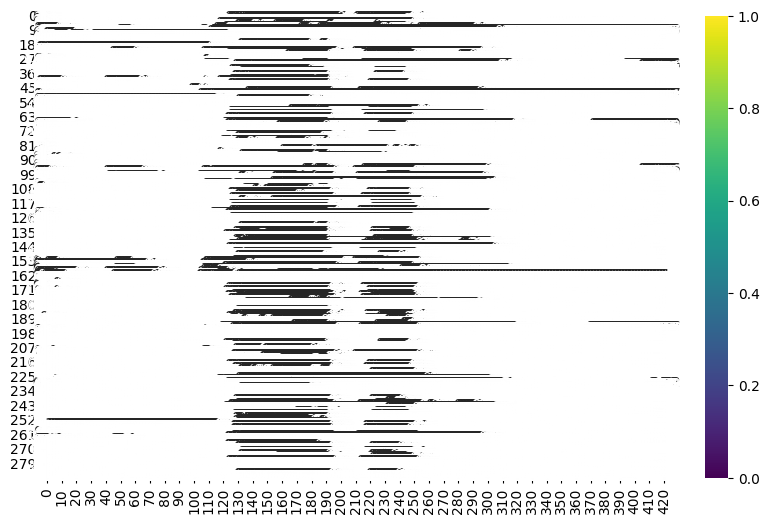

In [104]:
plt.figure(figsize=(10, 6))
sns.heatmap(X, annot=True, cmap='viridis', cbar=True)

# Show the plot
plt.show()

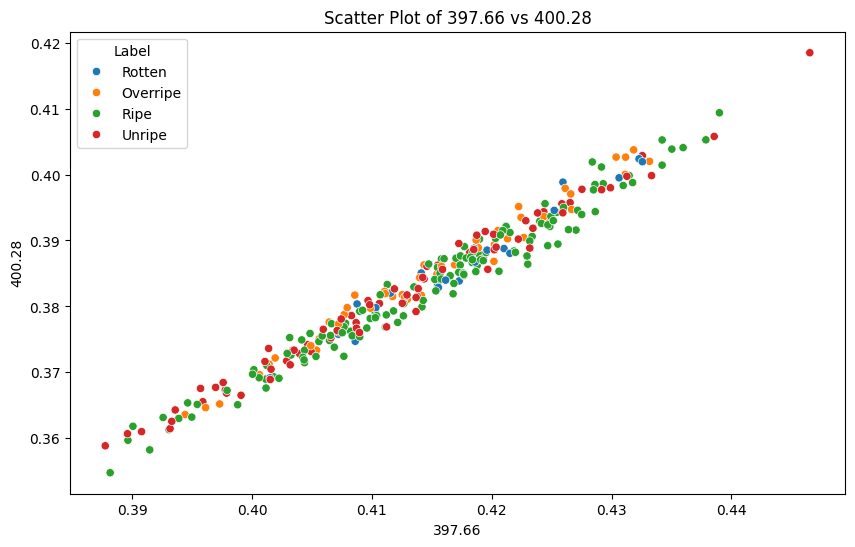

In [18]:
x_column = '397.66'
y_column = '400.28'

plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_column, y=y_column, hue='Label', data=df)
plt.title(f'Scatter Plot of {x_column} vs {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.legend(title='Label')
plt.show()


In [20]:
X.head()

,DRY MATTER,397.66,400.28,402.9,405.52,408.13,410.75,413.37,416,418.62,...,1684.44,1688.02,1691.59,1695.17,1698.75,1702.33,1705.91,1709.49,1713.07,1716.65
0,0.168033,0.415485,0.383244,0.351456,0.326875,0.308858,0.296541,0.288141,0.280010,0.272849,...,0.215581,0.217577,0.220452,0.223861,0.228166,0.233664,0.240525,0.248254,0.256775,0.263427
1,0.171717,0.417281,0.383864,0.350971,0.326197,0.307104,0.294010,0.285275,0.277006,0.269459,...,0.210253,0.212093,0.214919,0.218351,0.222681,0.228466,0.235393,0.243194,0.251689,0.258660
2,0.145000,0.424143,0.392674,0.361699,0.337758,0.319835,0.308165,0.300610,0.293103,0.286298,...,0.197826,0.199926,0.202916,0.206433,0.210867,0.216627,0.223640,0.231442,0.240114,0.247030
3,0.160656,0.421169,0.392193,0.362329,0.338916,0.320957,0.310502,0.302020,0.293645,0.287506,...,0.193815,0.195960,0.198973,0.202568,0.207206,0.212854,0.219782,0.227738,0.236556,0.243064
4,0.147436,0.424819,0.392754,0.360710,0.335537,0.317260,0.304983,0.296590,0.288411,0.280778,...,0.215046,0.217001,0.219864,0.223265,0.227586,0.233124,0.239957,0.247428,0.256028,0.262627


**MODEL**

In [99]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [69]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X= scaler.fit_transform(X)


In [73]:
X = X.astype('float32')
# X = X.apply(pd.to_numeric, errors='coerce')
# X = X.fillna(0)
# X_array = X.values

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [92]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(230, 1, 422)
(58, 1, 422)
(230, 4)
(58, 4)


In [100]:
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(1, X_train.shape[2]), return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(Y_train.shape[1], activation='softmax'))

# Compile the model
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 1, 128)            282112    
                                                                 
 batch_normalization (Batch  (None, 1, 128)            512       
 Normalization)                                                  
                                                                 
 dropout_16 (Dropout)        (None, 1, 128)            0         
                                                                 
 lstm_23 (LSTM)              (None, 1, 128)            131584    
                                                                 
 batch_normalization_1 (Bat  (None, 1, 128)            512       
 chNormalization)                                                
                                                                 
 dropout_17 (Dropout)        (None, 1, 128)          

In [101]:

history = model.fit(X_train, Y_train, epochs=200, batch_size=32, validation_data=(X_test, Y_test))


Epoch 1/200
8/8 [==============================] - 8s 105ms/step - loss: 2.0922 - accuracy: 0.2739 - val_loss: 1.3669 - val_accuracy: 0.4138
Epoch 2/200
8/8 [==============================] - 0s 21ms/step - loss: 1.8217 - accuracy: 0.3043 - val_loss: 1.3518 - val_accuracy: 0.4138
Epoch 3/200
8/8 [==============================] - 0s 20ms/step - loss: 1.7955 - accuracy: 0.3478 - val_loss: 1.3387 - val_accuracy: 0.4138
Epoch 4/200
8/8 [==============================] - 0s 18ms/step - loss: 1.9389 - accuracy: 0.3217 - val_loss: 1.3284 - val_accuracy: 0.4138
Epoch 5/200
8/8 [==============================] - 0s 18ms/step - loss: 1.5426 - accuracy: 0.3957 - val_loss: 1.3191 - val_accuracy: 0.4138
Epoch 6/200
8/8 [==============================] - 0s 20ms/step - loss: 1.5100 - accuracy: 0.4174 - val_loss: 1.3109 - val_accuracy: 0.4138
Epoch 7/200
8/8 [==============================] - 0s 24ms/step - loss: 1.5122 - accuracy: 0.4565 - val_loss: 1.3039 - val_accuracy: 0.4138
Epoch 8/200
8/8 [==

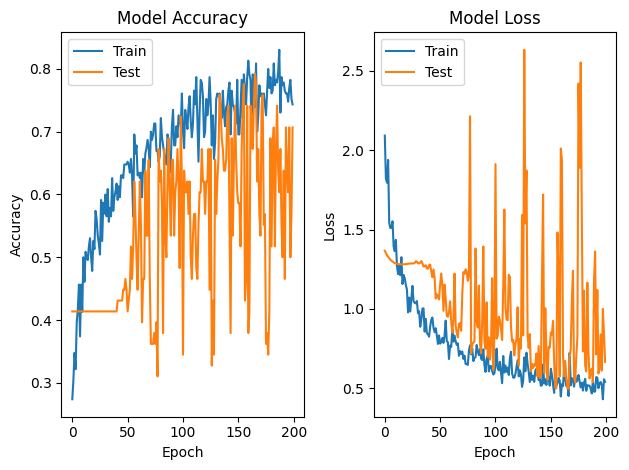

In [102]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [103]:
predictions = model.predict(X_test)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Convert true labels to class labels
true_classes = np.argmax(Y_test, axis=1)

# Calculate accuracy
accuracy = np.mean(predicted_classes == true_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')

2/2 [==============================] - 1s 6ms/step
Accuracy: 70.69%


In [107]:
label_map = {0: 'Overipe', 1: 'Ripe', 2: 'Rotten',3:'Unripe'}

In [110]:
predicted_labels = [label_map[label] for label in predicted_classes]
true_labels = [label_map[label] for label in true_classes]

In [109]:
predicted_labels

['Unripe',
 'Overipe',
 'Ripe',
 'Unripe',
 'Ripe',
 'Rotten',
 'Ripe',
 'Ripe',
 'Overipe',
 'Unripe',
 'Overipe',
 'Ripe',
 'Ripe',
 'Unripe',
 'Unripe',
 'Unripe',
 'Overipe',
 'Ripe',
 'Ripe',
 'Ripe',
 'Unripe',
 'Overipe',
 'Ripe',
 'Unripe',
 'Ripe',
 'Ripe',
 'Ripe',
 'Ripe',
 'Ripe',
 'Ripe',
 'Ripe',
 'Ripe',
 'Rotten',
 'Overipe',
 'Ripe',
 'Overipe',
 'Overipe',
 'Ripe',
 'Unripe',
 'Ripe',
 'Overipe',
 'Unripe',
 'Overipe',
 'Unripe',
 'Ripe',
 'Unripe',
 'Ripe',
 'Overipe',
 'Ripe',
 'Overipe',
 'Ripe',
 'Ripe',
 'Ripe',
 'Unripe',
 'Ripe',
 'Unripe',
 'Ripe',
 'Overipe']

In [111]:
true_labels


['Ripe',
 'Rotten',
 'Ripe',
 'Unripe',
 'Ripe',
 'Overipe',
 'Unripe',
 'Ripe',
 'Overipe',
 'Ripe',
 'Overipe',
 'Ripe',
 'Ripe',
 'Unripe',
 'Unripe',
 'Unripe',
 'Overipe',
 'Overipe',
 'Ripe',
 'Unripe',
 'Unripe',
 'Rotten',
 'Ripe',
 'Unripe',
 'Ripe',
 'Unripe',
 'Ripe',
 'Ripe',
 'Ripe',
 'Ripe',
 'Ripe',
 'Unripe',
 'Rotten',
 'Overipe',
 'Unripe',
 'Rotten',
 'Overipe',
 'Ripe',
 'Unripe',
 'Ripe',
 'Overipe',
 'Unripe',
 'Overipe',
 'Ripe',
 'Ripe',
 'Unripe',
 'Overipe',
 'Rotten',
 'Ripe',
 'Rotten',
 'Unripe',
 'Ripe',
 'Ripe',
 'Unripe',
 'Ripe',
 'Unripe',
 'Ripe',
 'Overipe']